# Calculate Free Cash Flow

## Setup

In [96]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [97]:
# Import libraries
import pandas as pd
import numpy as np

from investing.config.file_paths import input_data, output_data, financial_statements
from investing.tools.functions import cashflow_loader, sensitivity_plot

# Plottting libraries
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline
%config InlineBackend.figure_format ='retina'

<IPython.core.display.Javascript object>

## Configure

In [98]:
# File names
companies_file = "company_names.csv"
cashflow_file = "CashFlow.xlsx"
price_file = "price.csv"
fcf_start_file = 'fcf_start_data.csv'

<IPython.core.display.Javascript object>

## Load Data

In [99]:
# Load company names
df_names = pd.read_csv(input_data / companies_file)

<IPython.core.display.Javascript object>

In [100]:
df_cashflow = df_names[df_names['type']=='CashFlow'].sort_values('ticker')
df_cashflow

,ticker,name,type
1,AAPL,Apple,CashFlow
2,ACN,Accenture,CashFlow
4,AMZN,Amazon.com,CashFlow
7,BABA,Alibaba,CashFlow
17,COST,Costco,CashFlow
19,DFS,Discover Financial Services,CashFlow
20,EBAY,eBay,CashFlow
25,GOOG,Alphabet,CashFlow
26,IAG.L,International Consolidated Airlines Group,CashFlow
28,MA,Mastercard,CashFlow


<IPython.core.display.Javascript object>

## Build Company FCF

In [101]:
company_fcf = {}
for name in df_cashflow["ticker"]:
    company_fcf[name] = cashflow_loader(financial_statements / cashflow_file, name)

<IPython.core.display.Javascript object>

## FCF Growth

### Growth Forecasts

# TODO: Add dividends to data set

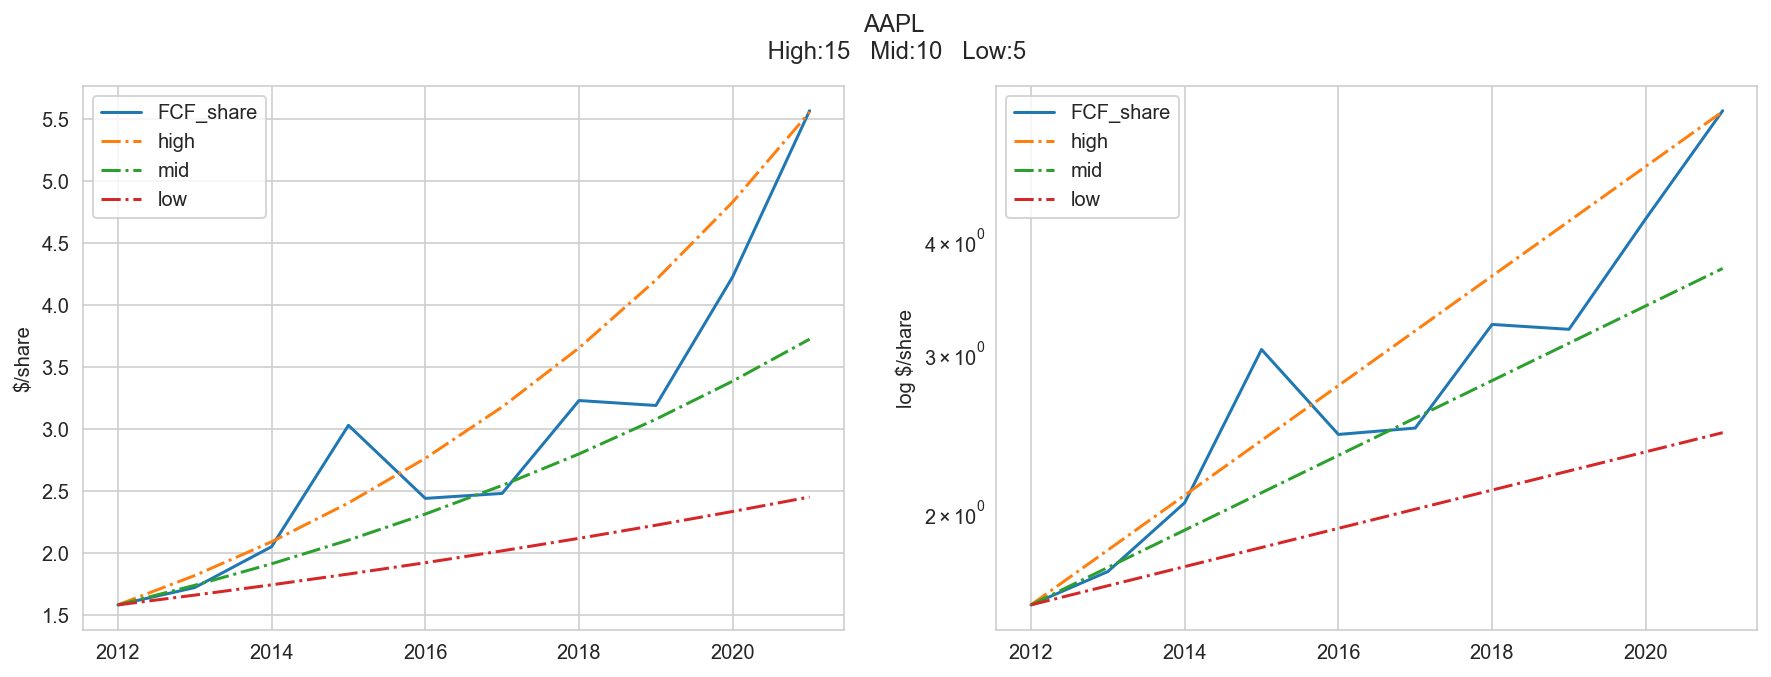

<IPython.core.display.Javascript object>

In [102]:
sensitivity_plot(company_fcf, "AAPL", 15, 10, 5, start_at=2012)

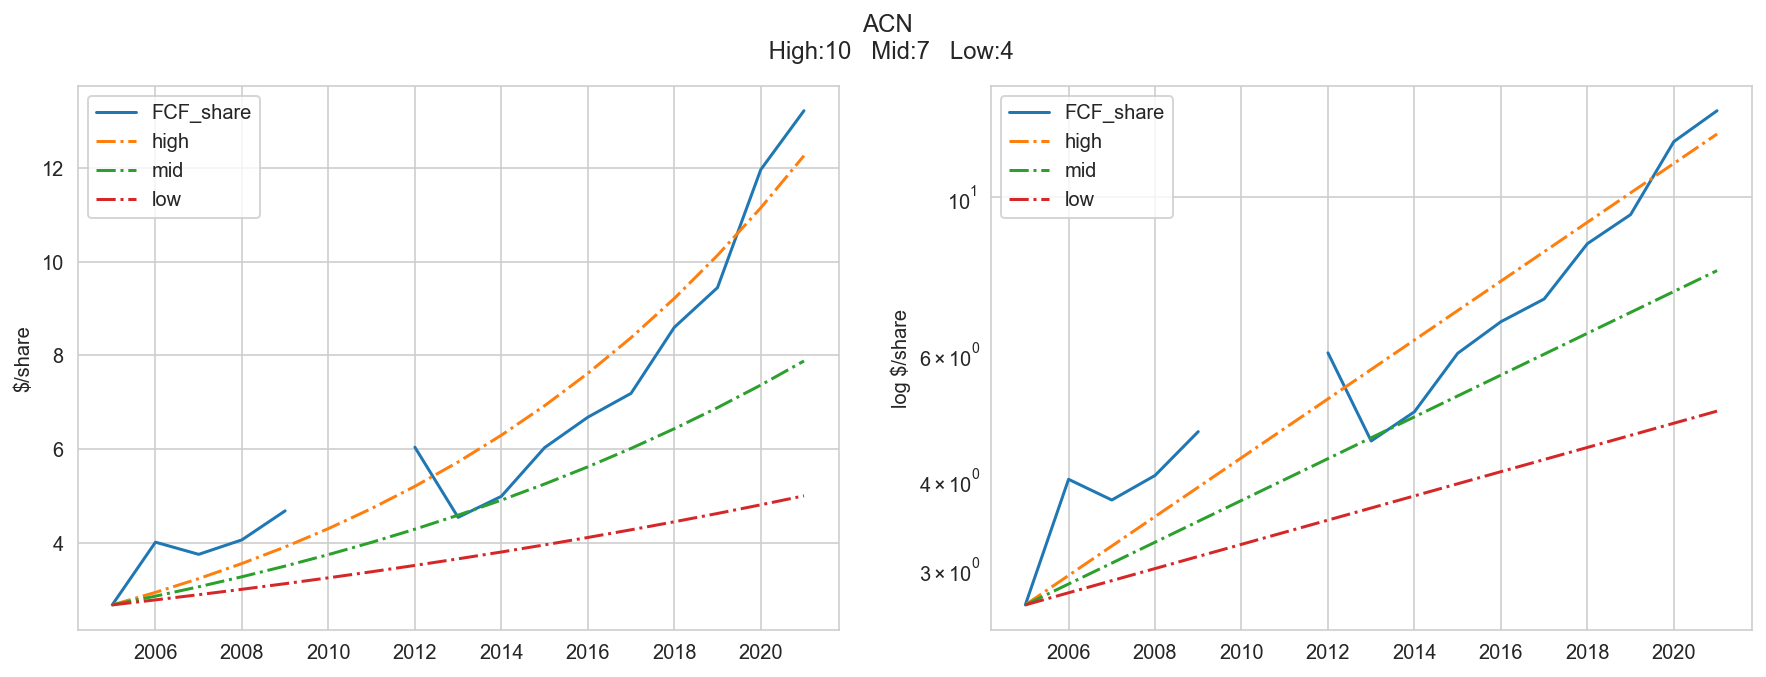

<IPython.core.display.Javascript object>

In [103]:
sensitivity_plot(company_fcf, "ACN", 10, 7, 4)

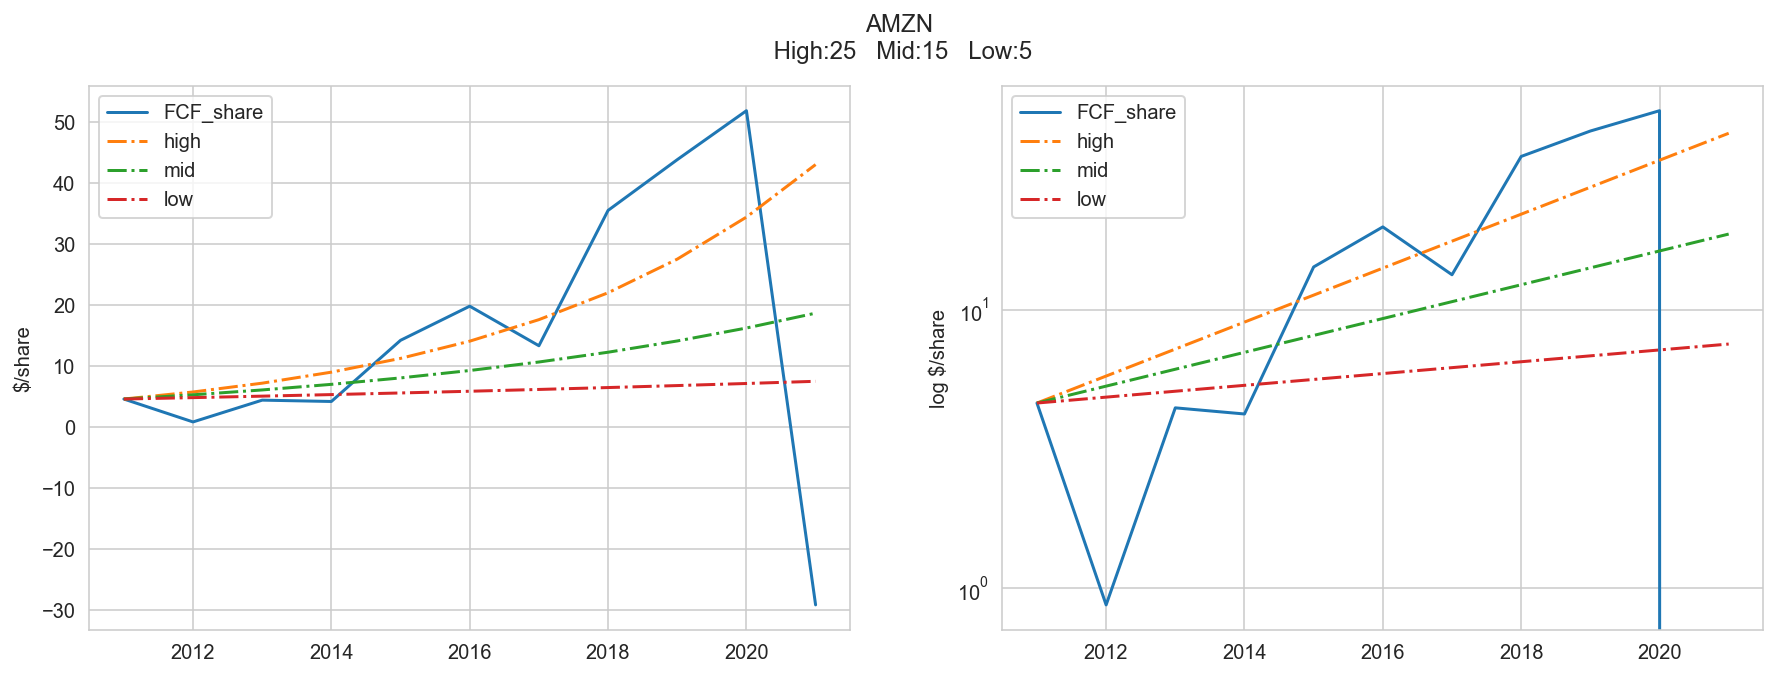

<IPython.core.display.Javascript object>

In [104]:
sensitivity_plot(company_fcf, "AMZN", 25, 15, 5,start_at=2011)

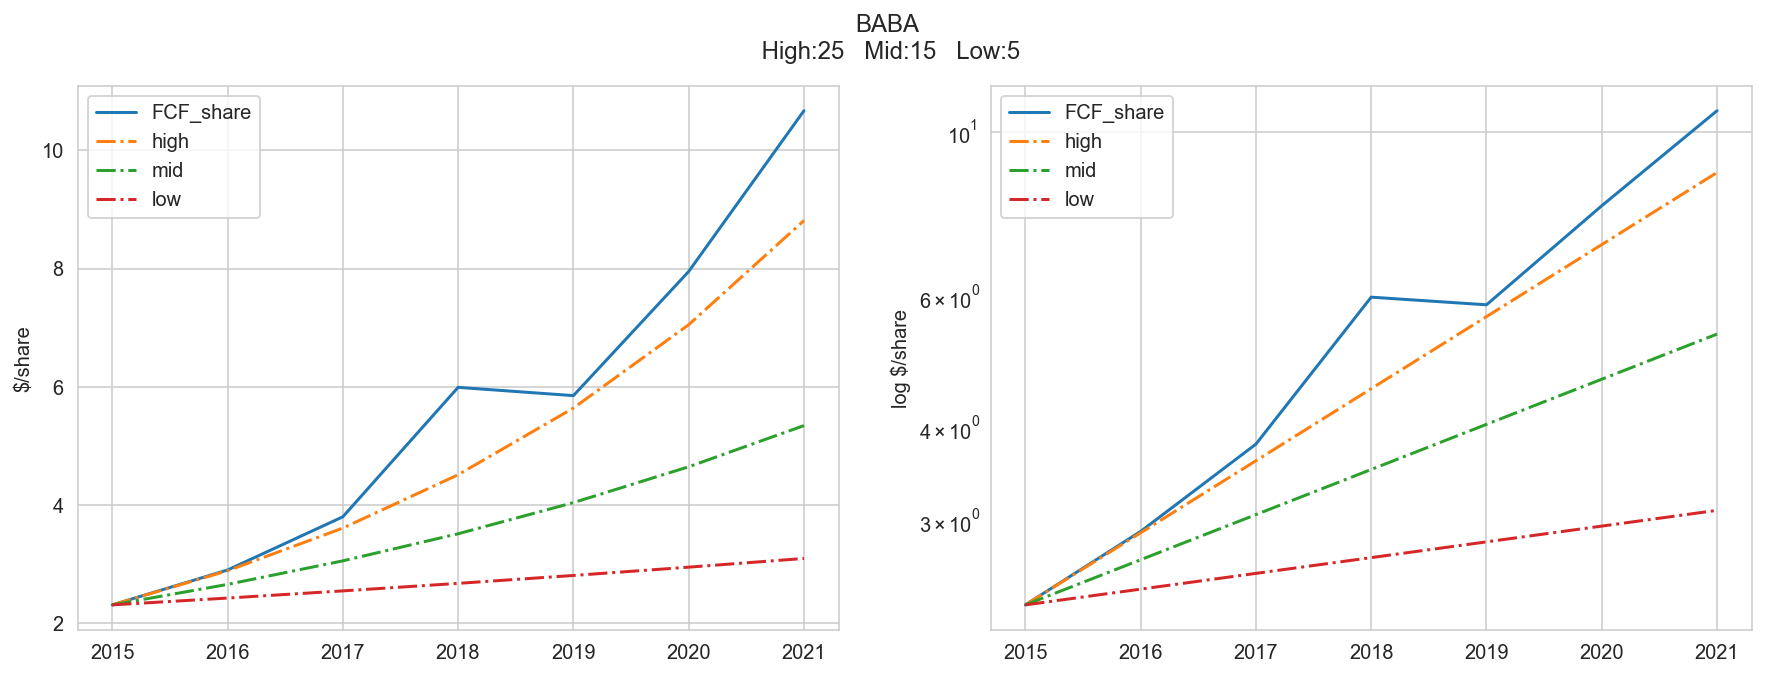

<IPython.core.display.Javascript object>

In [105]:
sensitivity_plot(company_fcf, "BABA", 25, 15, 5, start_at=2015)

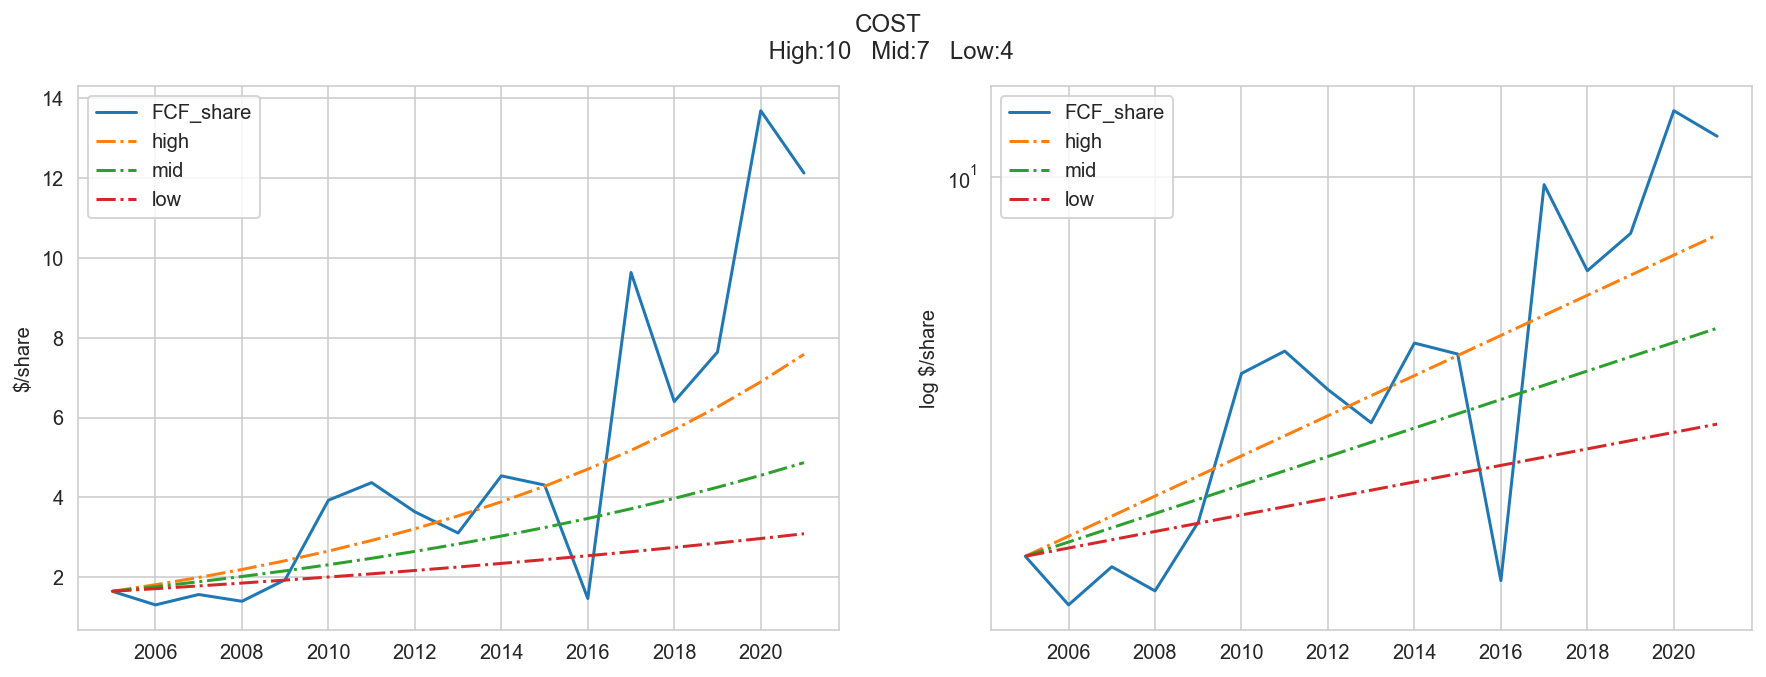

<IPython.core.display.Javascript object>

In [106]:
sensitivity_plot(company_fcf, "COST", 10, 7, 4)

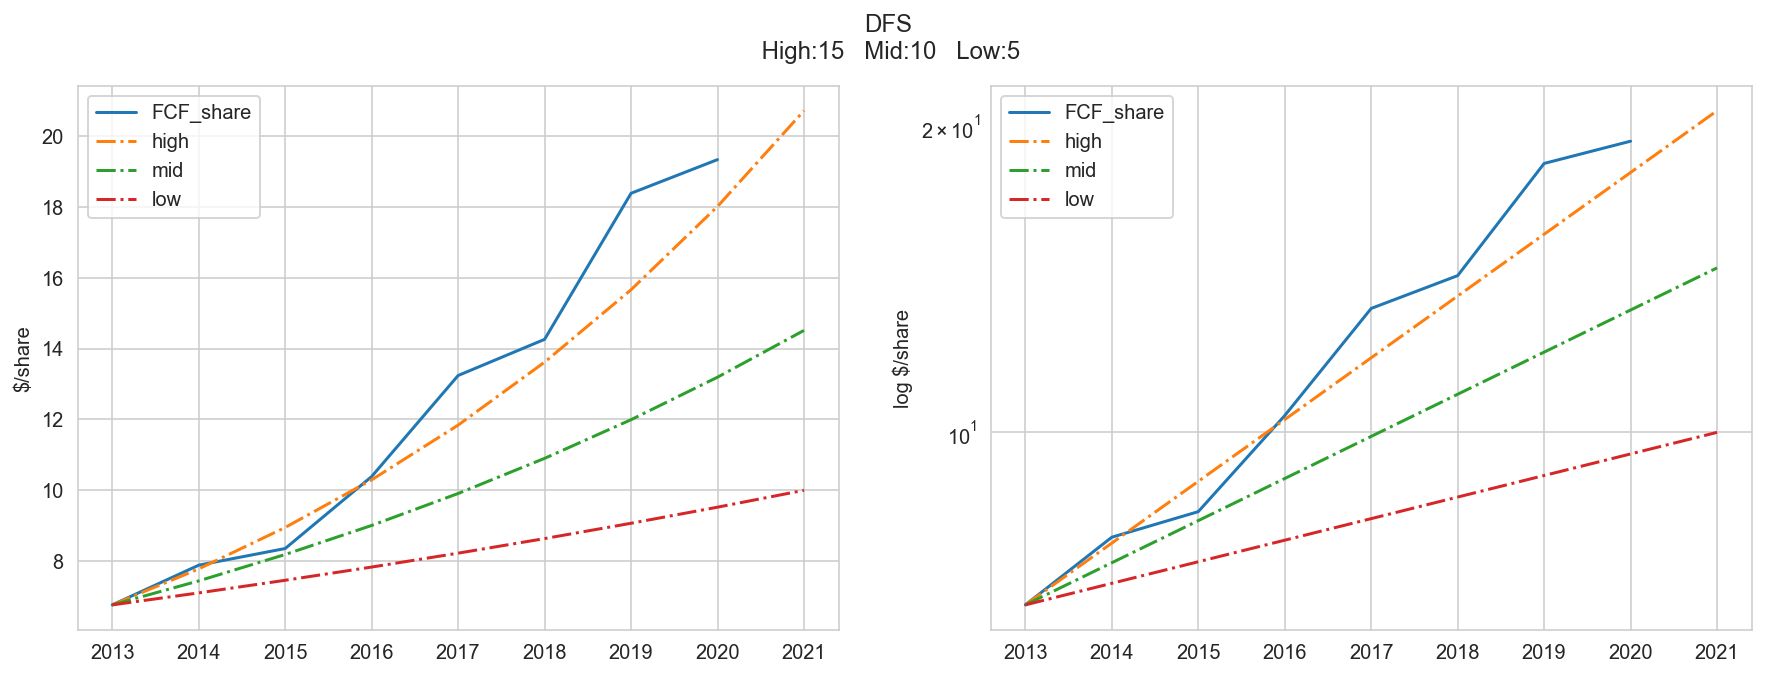

<IPython.core.display.Javascript object>

In [107]:
sensitivity_plot(company_fcf, "DFS", 15, 10, 5, start_at=2013)

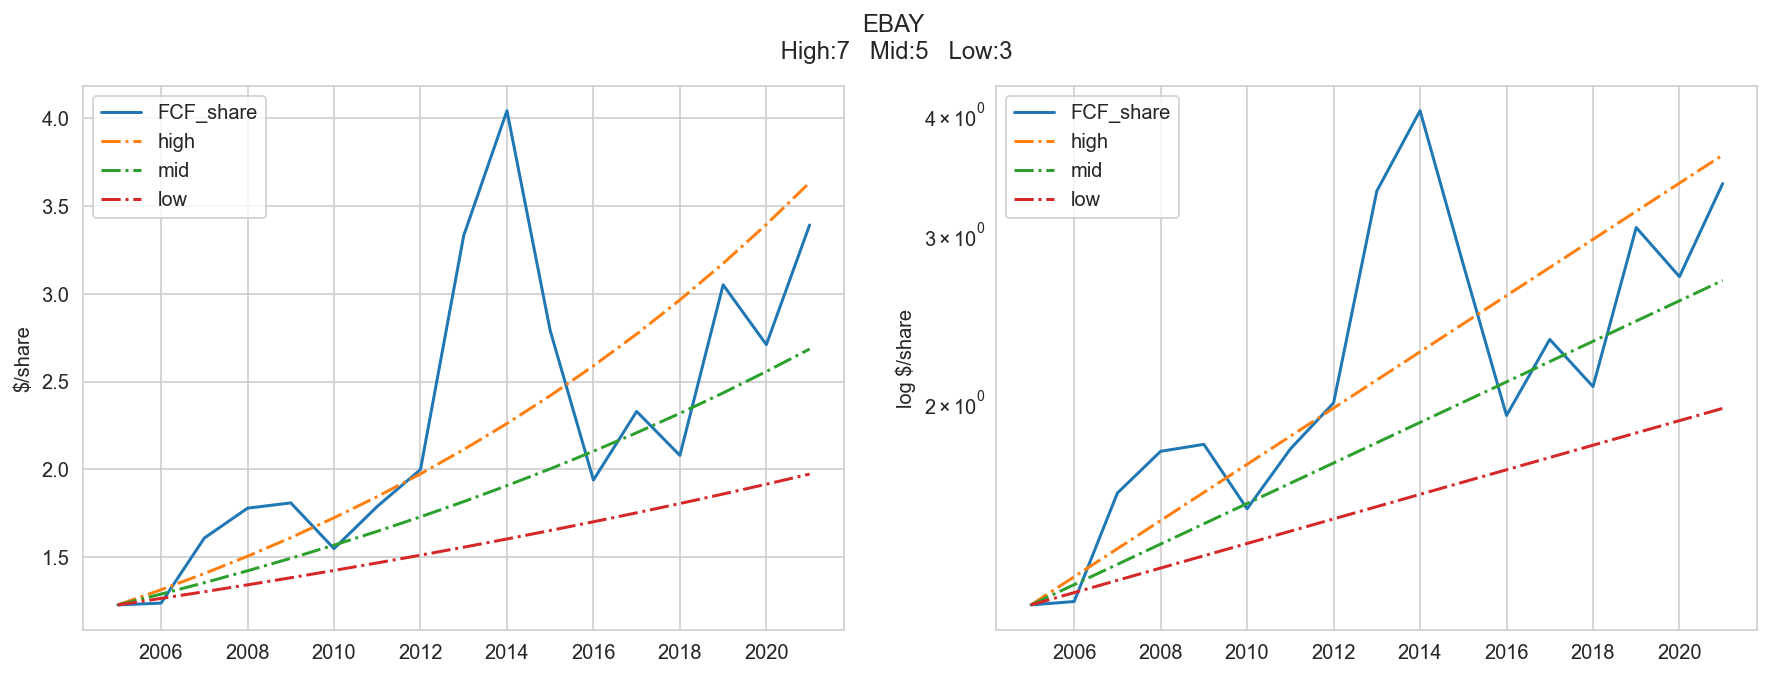

<IPython.core.display.Javascript object>

In [108]:
sensitivity_plot(company_fcf, "EBAY", 7, 5, 3)

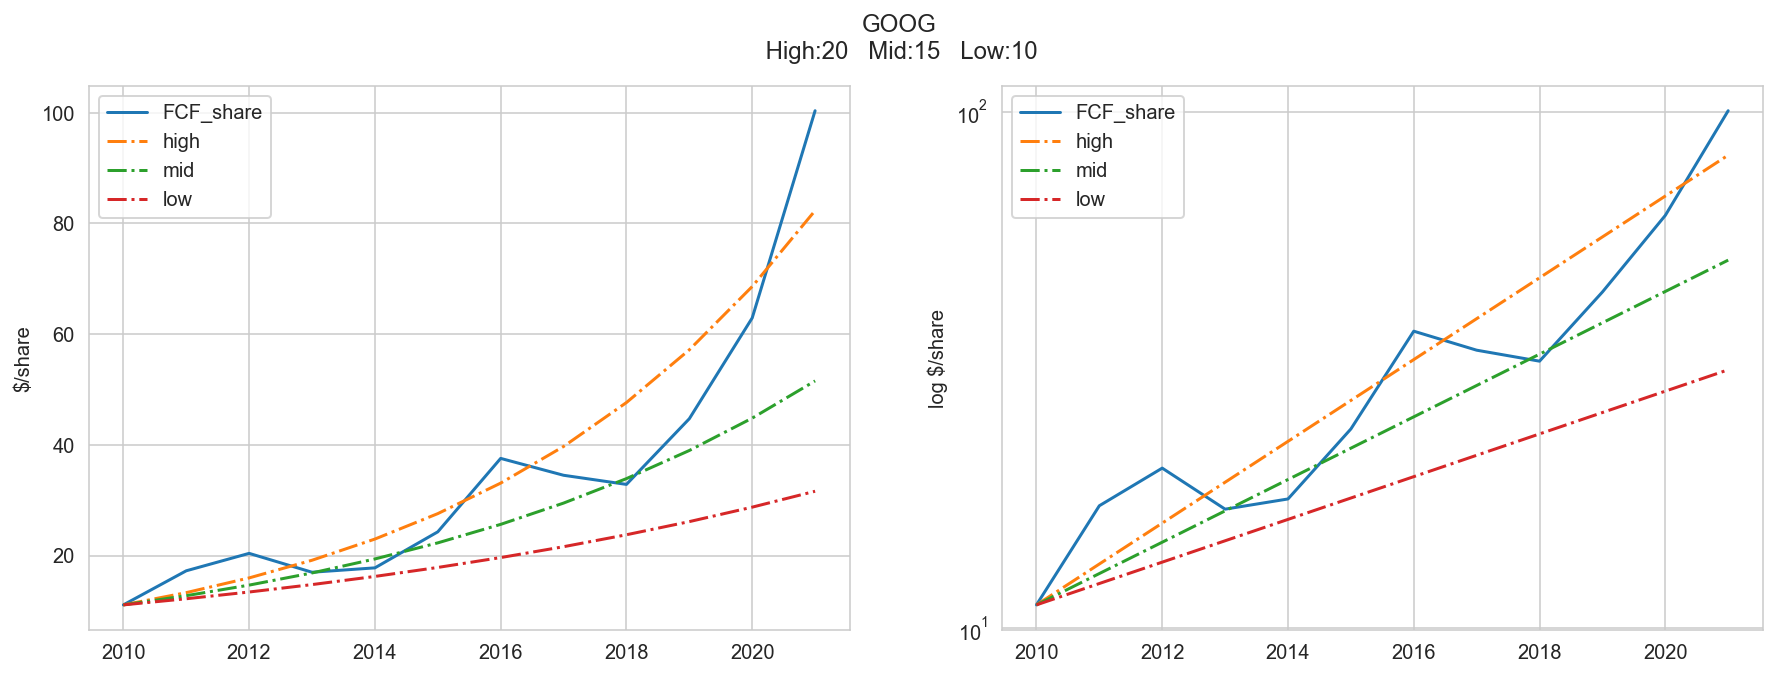

<IPython.core.display.Javascript object>

In [109]:
sensitivity_plot(company_fcf, "GOOG", 20, 15, 10, start_at=2010)

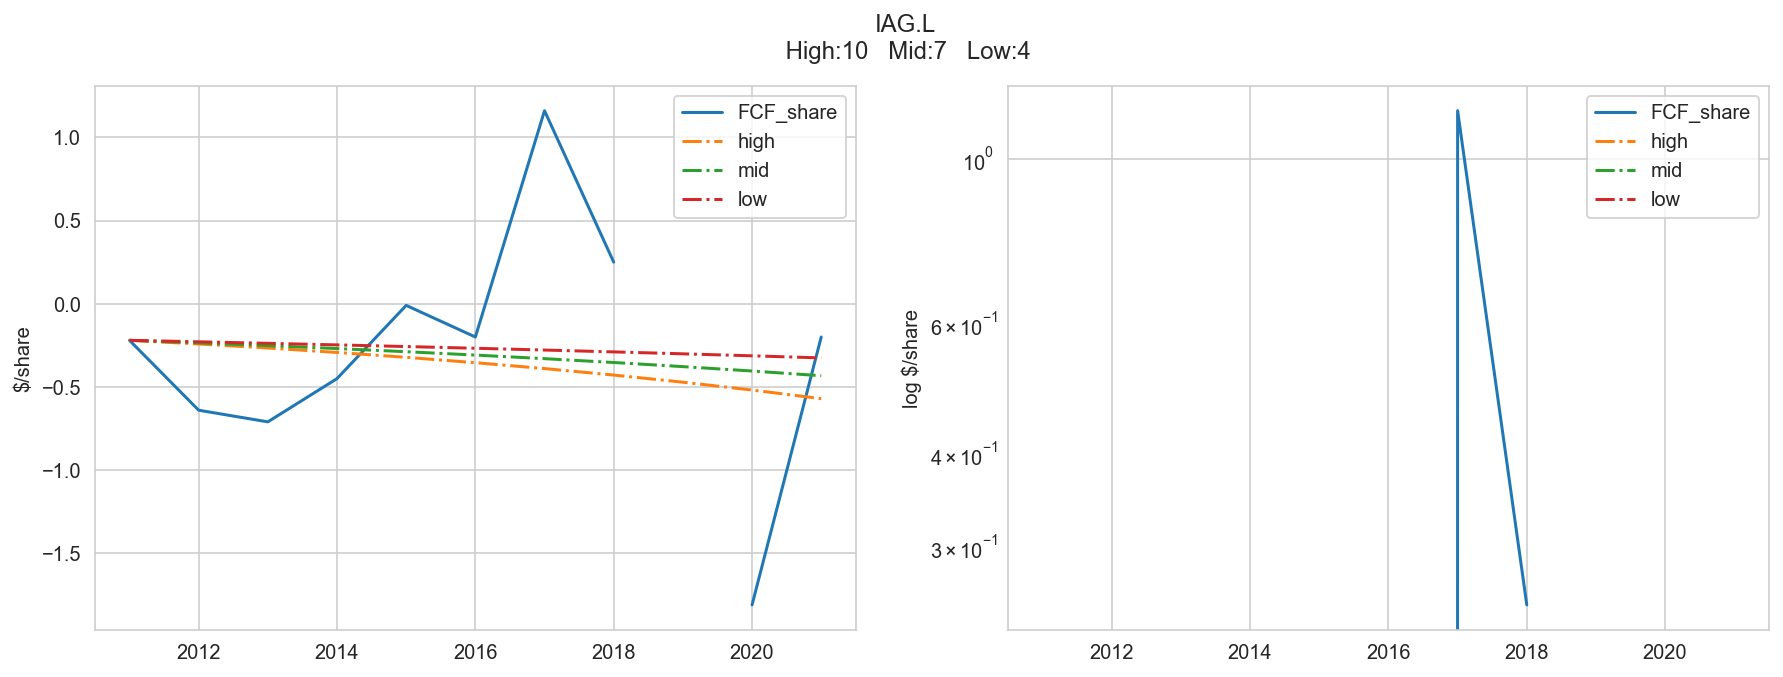

<IPython.core.display.Javascript object>

In [110]:
sensitivity_plot(company_fcf, "IAG.L", 10, 7, 4)

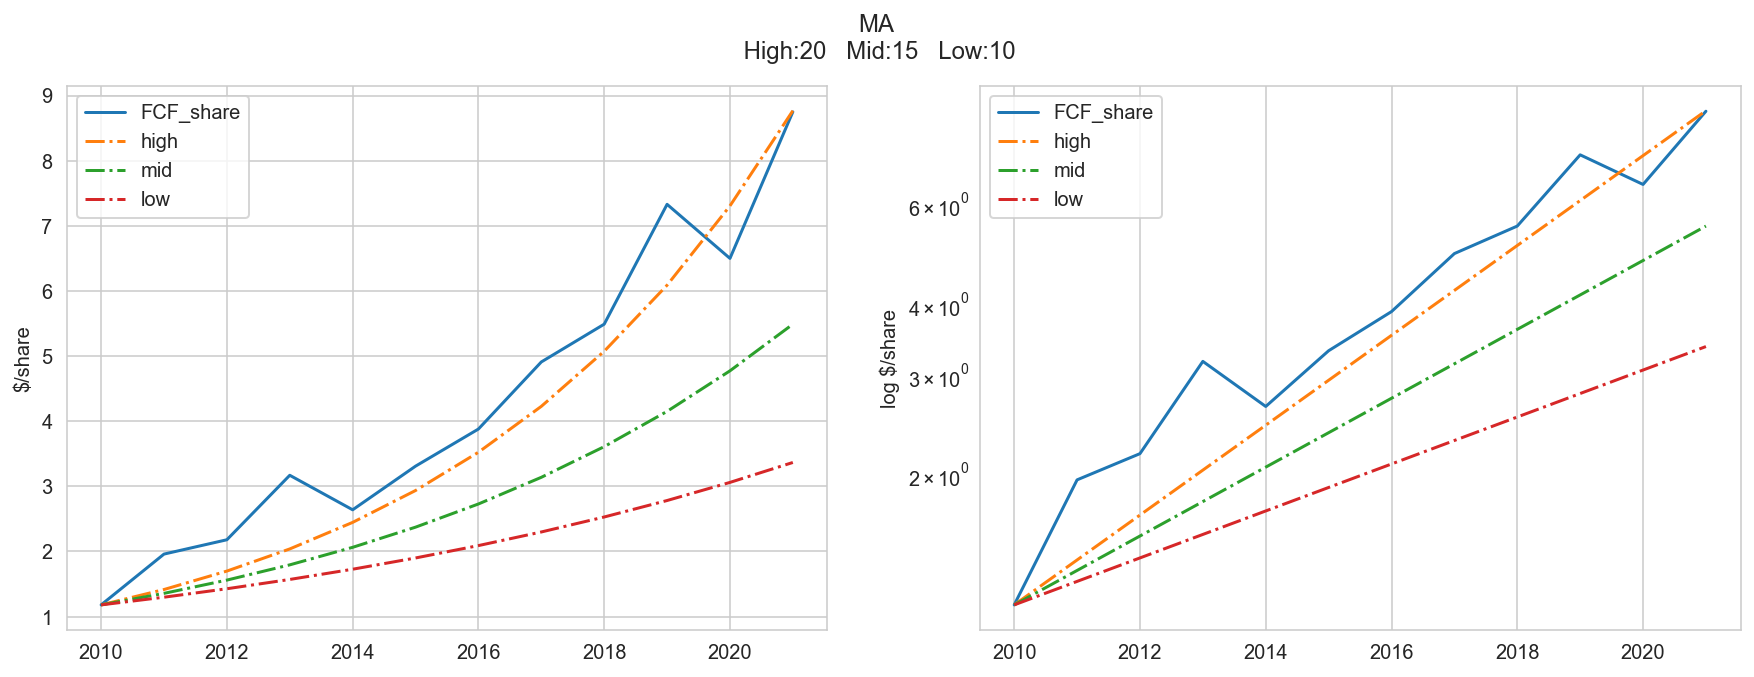

<IPython.core.display.Javascript object>

In [111]:
sensitivity_plot(company_fcf, "MA", 20, 15, 10, start_at=2010)

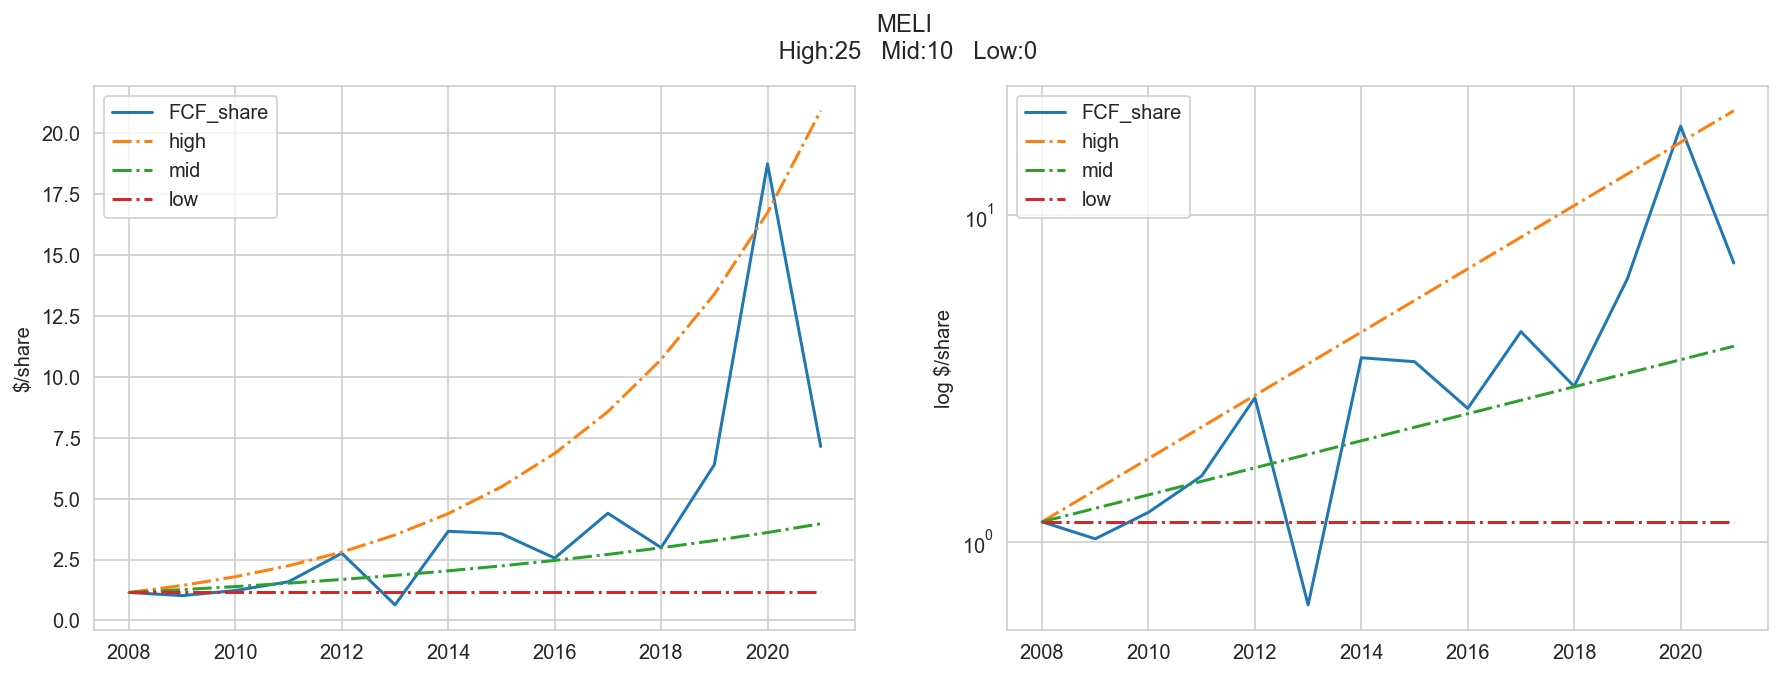

<IPython.core.display.Javascript object>

In [112]:
sensitivity_plot(company_fcf, "MELI", 25, 10, 0, start_at=2008)

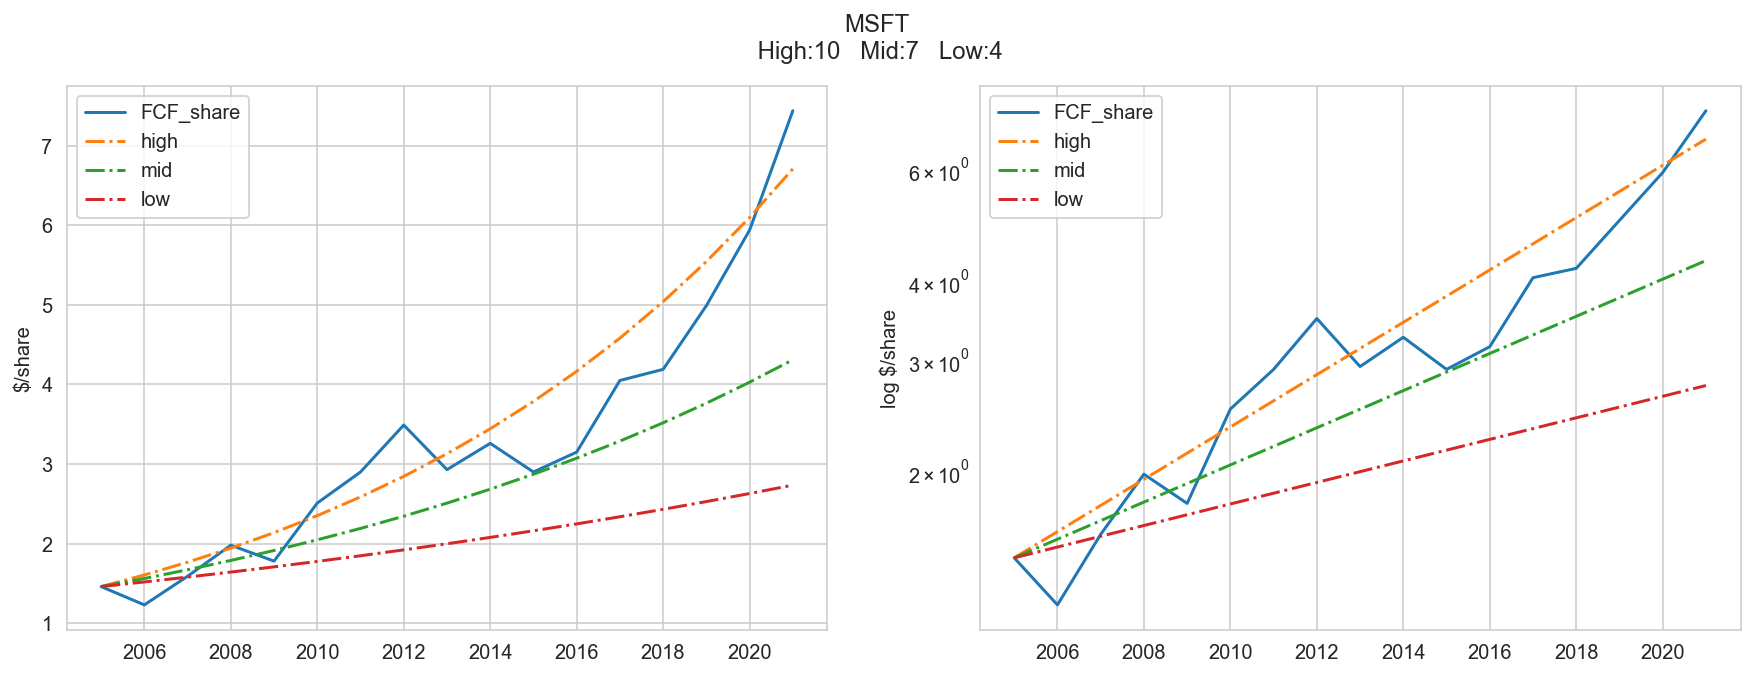

<IPython.core.display.Javascript object>

In [113]:
sensitivity_plot(company_fcf, "MSFT", 10, 7, 4)

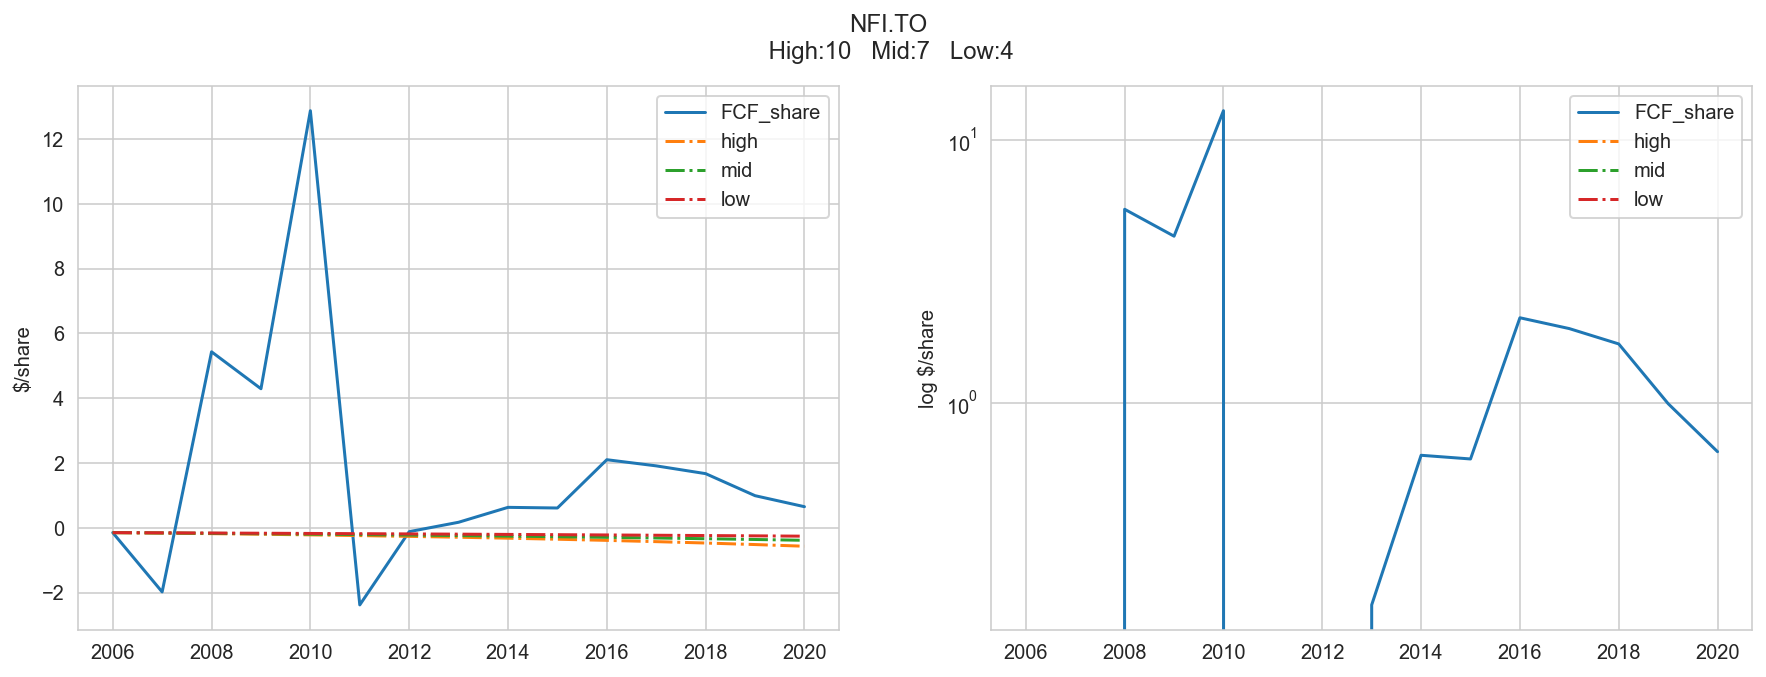

<IPython.core.display.Javascript object>

In [114]:
sensitivity_plot(company_fcf, "NFI.TO", 10, 7, 4)

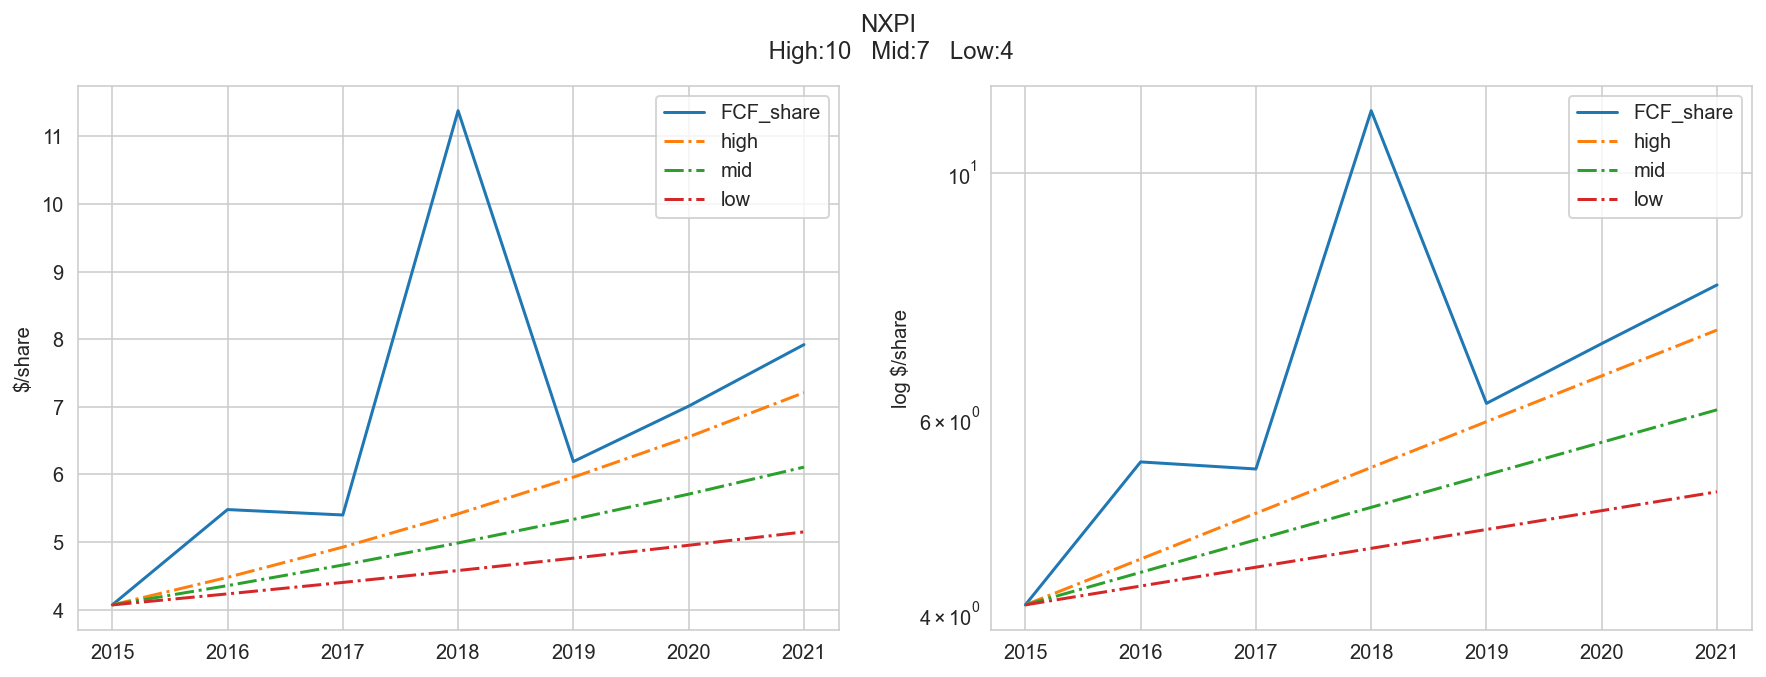

<IPython.core.display.Javascript object>

In [115]:
sensitivity_plot(company_fcf, "NXPI", 10, 7, 4, start_at=2015)

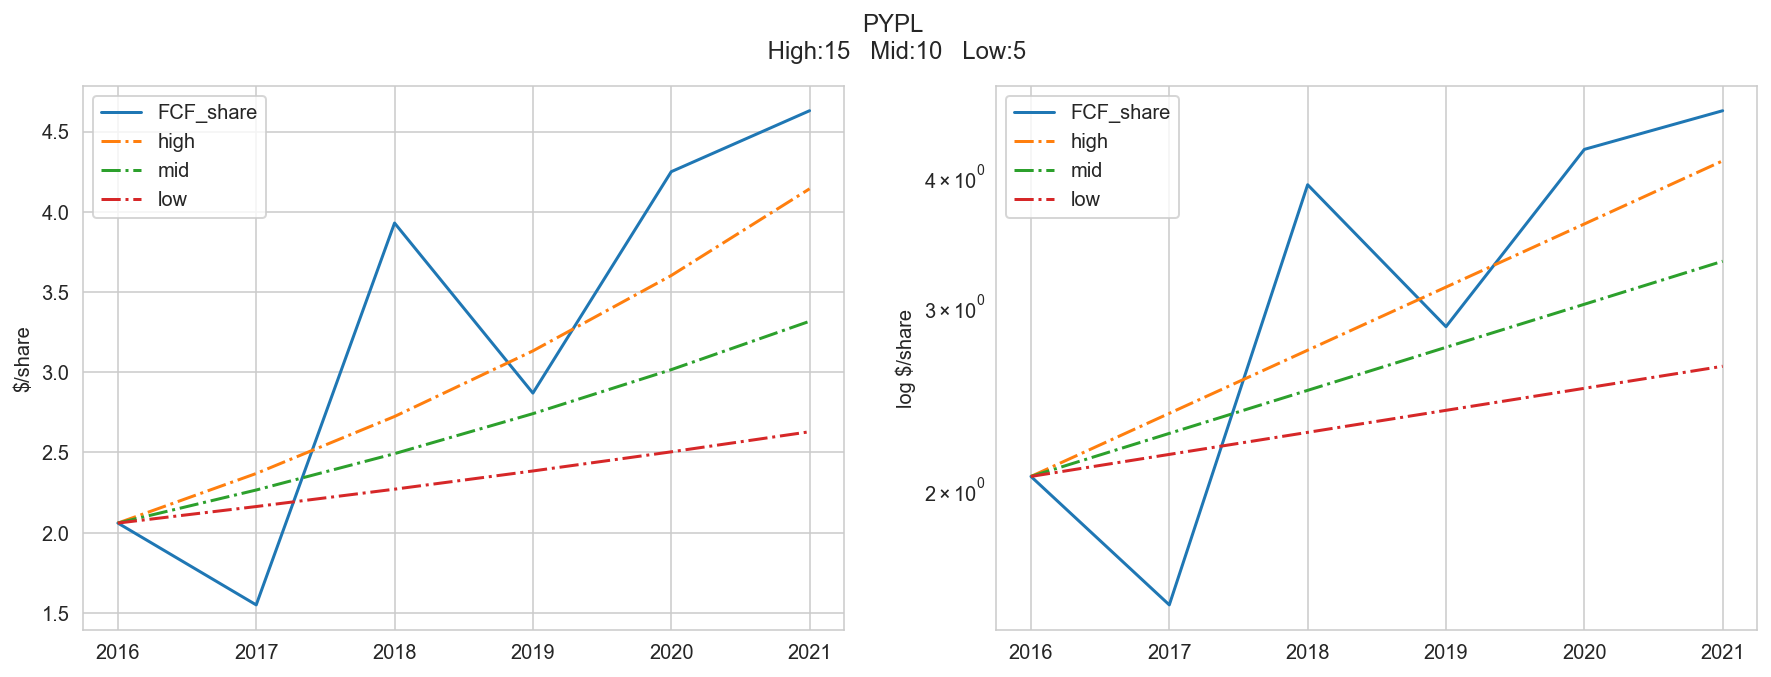

<IPython.core.display.Javascript object>

In [116]:
sensitivity_plot(company_fcf, "PYPL", 15, 10, 5, start_at=2016)

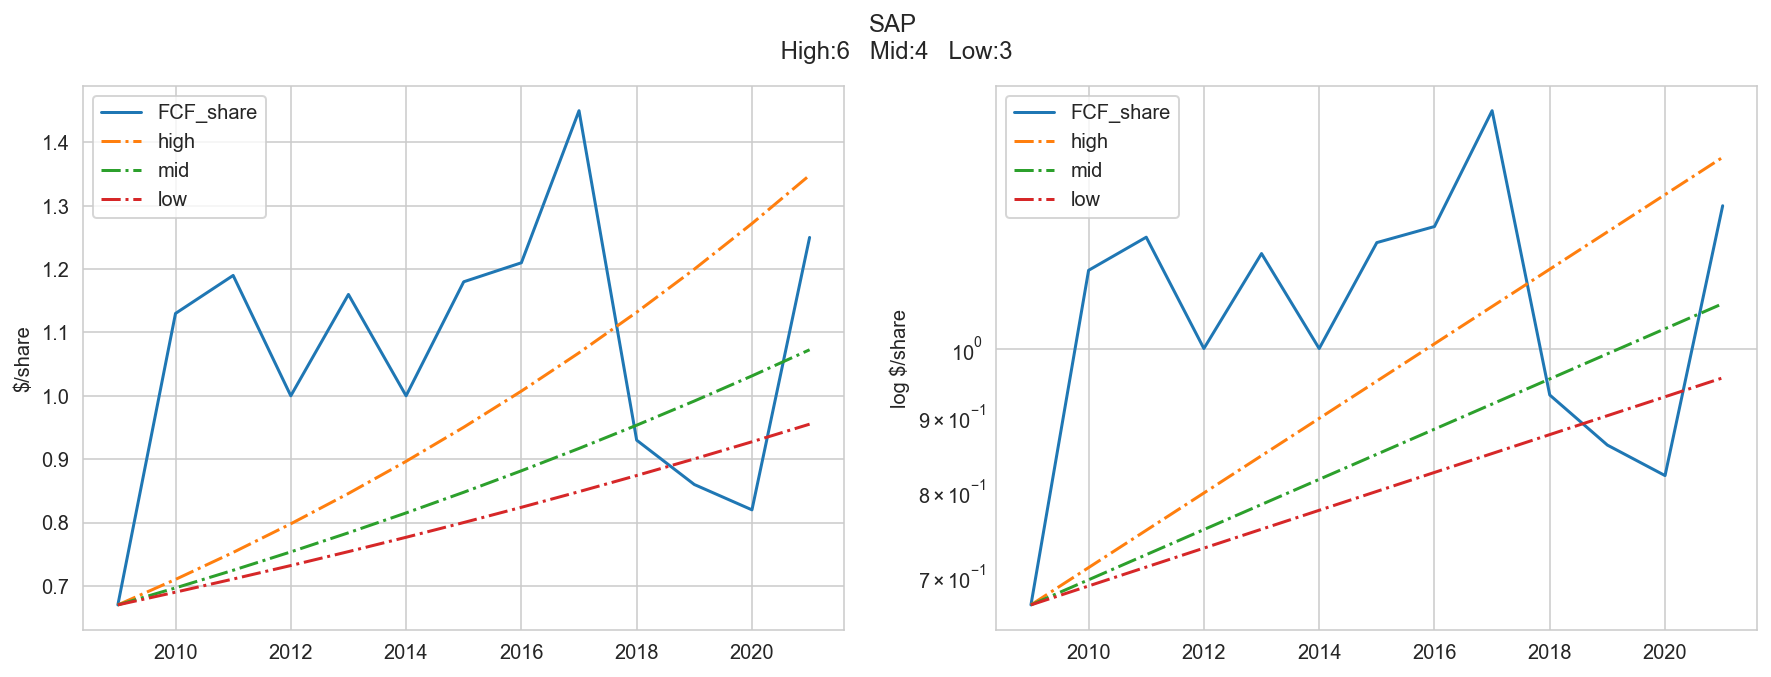

<IPython.core.display.Javascript object>

In [117]:
sensitivity_plot(company_fcf, "SAP", 6, 4, 3, start_at=2009)

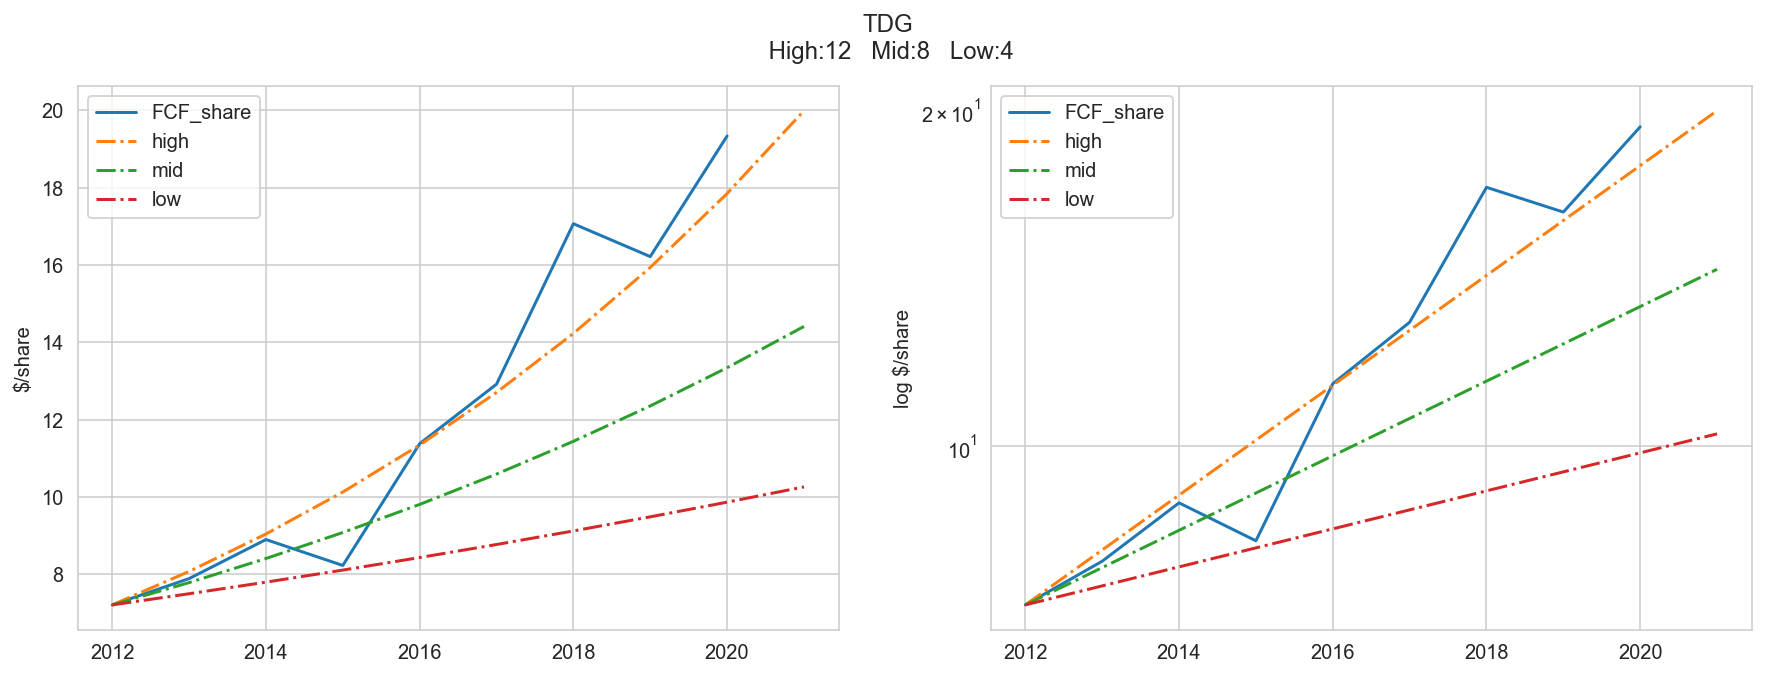

<IPython.core.display.Javascript object>

In [118]:
sensitivity_plot(company_fcf, "TDG", 12, 8, 4, start_at=2012)

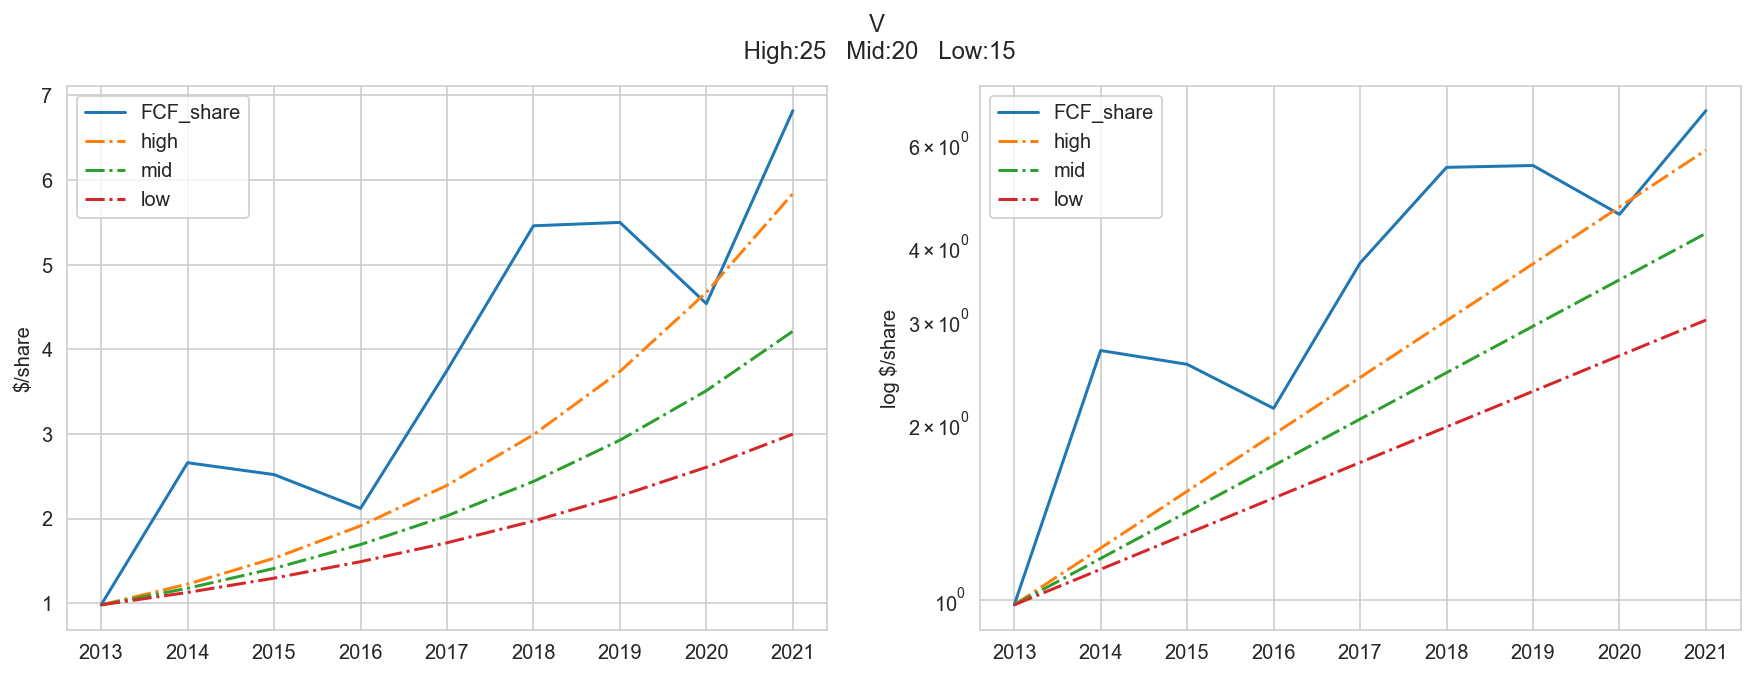

<IPython.core.display.Javascript object>

In [119]:
sensitivity_plot(company_fcf, "V", 25, 20, 15)

### FCF Starting Point Values

In [120]:
# Create a FCF dictionary for each company
fcf_dict = {}
for key, value in company_fcf.items():
    try:
        fcf_dict[key] = value.loc[value.last_valid_index(), "FCF_share"]

    except:
        print(key)

<IPython.core.display.Javascript object>

In [121]:
# Transform the dictionary to a dataframe of start values
df_start = pd.DataFrame.from_dict(
            data=fcf_dict, orient="index", columns=["start_value"]
        )
df_out=df_start.reset_index().rename(columns={'index':'ticker'})

<IPython.core.display.Javascript object>

In [122]:
# View latest FCF values
df_out

,ticker,start_value
0,AAPL,5.57
1,ACN,13.23
2,AMZN,-29.10
3,BABA,10.67
4,COST,12.12
5,DFS,19.33
6,EBAY,3.39
7,GOOG,100.37
8,IAG.L,-0.20
9,MA,8.75


<IPython.core.display.Javascript object>

In [123]:
# Override FCF values if needed
ticker = 'AMZN'
fcf_dict[ticker] = 30 # Assumption: the FCF will jump back to trend prior to covid

# Transform the dictionary to a dataframe of start values
df_start = pd.DataFrame.from_dict(
            data=fcf_dict, orient="index", columns=["start_value"]
        )
df_out=df_start.reset_index().rename(columns={'index':'ticker'})

<IPython.core.display.Javascript object>

In [125]:
# Final check
df_out

,ticker,start_value
0,AAPL,5.57
1,ACN,13.23
2,AMZN,30.00
3,BABA,10.67
4,COST,12.12
5,DFS,19.33
6,EBAY,3.39
7,GOOG,100.37
8,IAG.L,-0.20
9,MA,8.75


<IPython.core.display.Javascript object>

In [124]:
# Export to disk
df_out.to_csv(output_data/fcf_start_file,index=False)

<IPython.core.display.Javascript object>